# FFMPEG

In [3]:
# Transform into another format

In [9]:
! ffmpeg -i in.mp4 -vf eq=brighness=0.5

ffmpeg version n6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 13.2.1 (GCC) 20230801
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-frei0r --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libharfbuzz --enable-libiec61883 --enable-libjack --enable-libjxl --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libplacebo --enable-libpulse --enable-librav1e --enable-librsvg --enable-librubberband --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-

# GSTREAMER
[Docs](https://thiblahute.github.io/GStreamer-doc/doc_index.html?gi-language=python)

First of all, verify that you have a working installation and that you can inspect plugins by typing

In [8]:
! gst-inspect-1.0 fakesrc

Factory Details:
  Rank                     none (0)
  Long-name                Fake Source
  Klass                    Source
  Description              Push empty (no data) buffers around
  Author                   Erik Walthinsen <omega@cse.ogi.edu>, Wim Taymans <wim@fluendo.com>
  Documentation            https://gstreamer.freedesktop.org/documentation/coreelements/fakesrc.html

Plugin Details:
  Name                     coreelements
  Description              GStreamer core elements
  Filename                 /home/cest/.conda/envs/video-editor/bin/../lib/gstreamer-1.0/libgstcoreelements.so
  Version                  1.22.9
  License                  LGPL
  Source module            gstreamer
  Documentation            https://gstreamer.freedesktop.org/documentation/coreelements/
  Source release date      2024-01-24
  Binary package           GStreamer source release
  Origin URL               Unknown package origin

GObject
 +----GInitiallyUnowned
       +----GstObject
           

It's time to try out a few things. Start with gst-launch and two plug-ins that you really should have : fakesrc and fakesink. They do nothing except pass empty buffers. Type this at the command-line:

In [ ]:
! gst-launch-1.0 -v fakesrc silent=false num-buffers=3 ! fakesink silent=false

To get a test video displayed, try:

In [4]:
! gst-launch-1.0 videotestsrc ! videoconvert ! autovideosink

Setting pipeline to PAUSED ...
Pipeline is PREROLLING ...
Pipeline is PREROLLED ...
Setting pipeline to PLAYING ...
Redistribute latency...
New clock: GstSystemClock
ERROR: from element /GstPipeline:pipeline0/GstAutoVideoSink:autovideosink0/GstXvImageSink:autovideosink0-actual-sink-xvimage: Output window was closed
Additional debug info:
../gstreamer/subprojects/gst-plugins-base/sys/xvimage/xvimagesink.c(586): gst_xv_image_sink_handle_xevents (): /GstPipeline:pipeline0/GstAutoVideoSink:autovideosink0/GstXvImageSink:autovideosink0-actual-sink-xvimage
Execution ended after 0:00:01.100090416
Setting pipeline to NULL ...
ERROR: from element /GstPipeline:pipeline0/GstVideoTestSrc:videotestsrc0: Internal data stream error.
Additional debug info:
../gstreamer/subprojects/gstreamer/libs/gst/base/gstbasesrc.c(3132): gst_base_src_loop (): /GstPipeline:pipeline0/GstVideoTestSrc:videotestsrc0:
streaming stopped, reason error (-5)
Freeing pipeline ...


You can test this by trying to play a sine tone. For this, you need to link the audiotestsrc element to an output element that matches your hardware. A (non-complete) list of output plug-ins for audio is

* pulsesink for Pulseaudio output

* alsasink for ALSA output

* osssink and oss4sink for OSS/OSSv4 output

* jackaudiosink for JACK output

* autoaudiosink for automatic audio output selection

First of all, run gst-inspect-1.0 on the output plug-in you want to use to make sure you have it installed. For example, if you use Pulseaudio, run

In [12]:
! gst-inspect-1.0 pulsesink

Factory Details:
  Rank                     primary + 10 (266)
  Long-name                PulseAudio Audio Sink
  Klass                    Sink/Audio
  Description              Plays audio to a PulseAudio server
  Author                   Lennart Poettering
  Documentation            https://gstreamer.freedesktop.org/documentation/pulseaudio/pulsesink.html

Plugin Details:
  Name                     pulseaudio
  Description              PulseAudio plugin library
  Filename                 /home/cest/.conda/envs/video-editor/bin/../lib/gstreamer-1.0/libgstpulseaudio.so
  Version                  1.22.9
  License                  LGPL
  Source module            gst-plugins-good
  Documentation            https://gstreamer.freedesktop.org/documentation/pulseaudio/
  Source release date      2024-01-24
  Binary package           GStreamer Good Plug-ins source release
  Origin URL               Unknown package origin

GObject
 +----GInitiallyUnowned
       +----GstObject
             +----G

## How can you see what GStreamer plugins you have on your system?

To do this you use the gst-inspect command-line tool, which comes standard with GStreamer. Invoked without any arguments,

In [15]:
! gst-inspect-1.0

accurip:  accurip: AccurateRip(TM) CRC element
adaptivedemux2:  dashdemux2: DASH Demuxer
adaptivedemux2:  hlsdemux2: HLS Demuxer
adaptivedemux2:  mssdemux2: Smooth Streaming demuxer (v2)
adder:  adder: Adder
adpcmdec:  adpcmdec: ADPCM decoder
adpcmenc:  adpcmenc: ADPCM encoder
aes:  aesdec: aesdec
aes:  aesenc: aesenc
aiff:  aiffmux: AIFF audio muxer
aiff:  aiffparse: AIFF audio demuxer
alaw:  alawdec: A Law audio decoder
alaw:  alawenc: A Law audio encoder
alpha:  alpha: Alpha filter
alphacolor:  alphacolor: Alpha color filter
alsa:  alsadeviceprovider (GstDeviceProviderFactory)
alsa:  alsamidisrc: AlsaMidi Source
alsa:  alsasink: Audio sink (ALSA)
alsa:  alsasrc: Audio source (ALSA)
apetag:  apedemux: APE tag demuxer
app:  appsink: AppSink
app:  appsrc: AppSrc
asf:  asfdemux: ASF Demuxer
asf:  rtpasfdepay: RTP ASF packet depayloader
asf:  rtspwms: WMS RTSP Extension
asfmux:  asfmux: ASF muxer
asfmux:  asfparse: ASF parser
asfmux:  rtpasfpay: RTP ASF payloader
audiobuffersplit:  audio

## Hello World

Then try to play the sine tone by running

In [17]:
! gst-launch-1.0 audiotestsrc ! audioconvert ! audioresample ! pulsesink

Setting pipeline to PAUSED ...
Pipeline is PREROLLING ...
Redistribute latency...
Pipeline is PREROLLED ...
Setting pipeline to PLAYING ...
Redistribute latency...
New clock: GstPulseSinkClock
^C00:02.4 / 99:99:99.
handling interrupt.
Interrupt: Stopping pipeline ...
Execution ended after 0:00:02.617781699
Setting pipeline to NULL ...
Freeing pipeline ...


In [20]:
! gst-play-1.0 mov_bbb.mp4

Press 'k' to see a list of keyboard shortcuts.
Now playing /home/cest/Workspace/video-editor/mov_bbb.mp4
Redistribute latency...
Redistribute latency...
Redistribute latency...
Redistribute latency...
Redistribute latency...
0:00:10.0 / 0:00:10.0       
Reached end of play list.



In [18]:
! gst-launch-1.0 filesrc location=mov_bbb.mp4 ! decodebin ! videoconvert ! autovideosink

Setting pipeline to PAUSED ...
Pipeline is PREROLLING ...
Redistribute latency...
Redistribute latency...
Redistribute latency...
Redistribute latency...
Pipeline is PREROLLED ...
Setting pipeline to PLAYING ...
Redistribute latency...
New clock: GstSystemClock
Got EOS from element "pipeline0".
Execution ended after 0:00:10.000138083
Setting pipeline to NULL ...
Freeing pipeline ...


In [ ]:
! gst-launch-1.0 filesrc location=sfx-sound.mp3 ! mpegaudioparse ! mpg123audiodec ! audioconvert ! pulsesink

In [18]:
! gst-launch-1.0 filesrc location=sfx-sound.mp3 ! mpegaudioparse ! mpg123audiodec ! audioconvert ! pulsesink

Setting pipeline to PAUSED ...
Pipeline is PREROLLING ...
Redistribute latency...
Pipeline is PREROLLED ...
Setting pipeline to PLAYING ...
Redistribute latency...
New clock: GstPulseSinkClock
Got EOS from element "pipeline0".
Execution ended after 0:00:06.975638155
Setting pipeline to NULL ...
Freeing pipeline ...


In [8]:
! gst-launch-1.0 v4l2src ! decodebin ! videoconvert ! autovideosink

Setting pipeline to PAUSED ...
Pipeline is live and does not need PREROLL ...
Pipeline is PREROLLED ...
Setting pipeline to PLAYING ...
New clock: GstSystemClock
Redistribute latency...
ERROR: from element /GstPipeline:pipeline0/GstAutoVideoSink:autovideosink0/GstXvImageSink:autovideosink0-actual-sink-xvimage: Output window was closed
Additional debug info:
../gstreamer/subprojects/gst-plugins-base/sys/xvimage/xvimagesink.c(586): gst_xv_image_sink_handle_xevents (): /GstPipeline:pipeline0/GstAutoVideoSink:autovideosink0/GstXvImageSink:autovideosink0-actual-sink-xvimage
Execution ended after 0:00:06.777943703
Setting pipeline to NULL ...
ERROR: from element /GstPipeline:pipeline0/GstV4l2Src:v4l2src0: Internal data stream error.
Additional debug info:
../gstreamer/subprojects/gstreamer/libs/gst/base/gstbasesrc.c(3132): gst_base_src_loop (): /GstPipeline:pipeline0/GstV4l2Src:v4l2src0:
streaming stopped, reason error (-5)
Freeing pipeline ...


## OpenCV

In [3]:
import cv2

print(cv2.getBuildInformation())


General configuration for OpenCV 4.9.0 =====================================
  Version control:               unknown

  Extra modules:
    Location (extra):            /build/opencv/src/opencv_contrib-4.9.0/modules
    Version control (extra):     unknown

  Platform:
    Timestamp:                   2024-01-05T12:15:22Z
    Host:                        Linux 6.6.7-arch1-1 x86_64
    CMake:                       3.28.1
    CMake generator:             Unix Makefiles
    CMake build tool:            /usr/bin/make
    Configuration:               Release

  CPU/HW features:
    Baseline:                    SSE SSE2
      requested:                 SSE3
      required:                  SSE2
      disabled:                  SSE3
    Dispatched code generation:  SSE4_1 SSE4_2 FP16 AVX AVX2 AVX512_SKX
      requested:                 SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX
      SSE4_1 (16 files):         + SSE3 SSSE3 SSE4_1
      SSE4_2 (1 files):          + SSE3 SSSE3 SSE4_1 POPCNT SSE4_2

In [2]:
import numpy as np
import cv2

cap = cv2.VideoCapture('videotestsrc!decodebin!videoconvert!appsink',cv2.CAP_GSTREAMER)


while True:
    ret,frame = cap.read()
    if cv2.waitKey(1)&0xFF == ord('q'):
        break
    if not ret:
        break

    cv2.imshow('', frame)

cv2.destroyAllWindows()
cap.release()

[ WARN:0@8.421] global cap_gstreamer.cpp:1777 open OpenCV | GStreamer warning: Cannot query video position: status=1, value=0, duration=-1


## YouTube
[Stream your cameras](https://github.com/matthew1000/gstreamer-cheat-sheet/blob/master/rtmp.md)

[Watch videos](https://lifestyletransfer.com/how-to-watch-youtube-videos-with-gstreamer/)

Find your specific codecs

In [5]:
! gst-inspect-1.0 | grep "audio encoder"

alaw:  alawenc: A Law audio encoder
amrnb:  amrnbenc: AMR-NB audio encoder
faac:  faac: AAC audio encoder
fdkaac:  fdkaacenc: FDK AAC audio encoder
flac:  flacenc: FLAC audio encoder
gsm:  gsmenc: GSM audio encoder
ldac:  ldacenc: Bluetooth LDAC audio encoder
libav:  avenc_anull: libav null audio encoder
libav:  avenc_dfpwm: libav DFPWM1a audio encoder
mulaw:  mulawenc: Mu Law audio encoder
openaptx:  openaptxenc: Bluetooth aptX/aptX-HD audio encoder using libopenaptx
opus:  opusenc: Opus audio encoder
sbc:  sbcenc: Bluetooth SBC audio encoder
speex:  speexenc: Speex audio encoder
vorbis:  vorbisenc: Vorbis audio encoder
wavpack:  wavpackenc: Wavpack audio encoder


## Stream a video demo


```bash
gst-launch-1.0 \
    videotestsrc is-live=1 \
    ! videoconvert \
    ! "video/x-raw, width=1280, height=720, framerate=30/1" \
    ! queue \
    ! x264enc cabac=1 bframes=2 ref=1 \
    ! "video/x-h264,profile=main" \
    ! flvmux streamable=true name=mux \
    ! rtmpsink location="${RTMP_DEST} live=1" \
    audiotestsrc is-live=1 wave=ticks \
    ! faac bitrate=128000 \
    ! mux.
```

# Processing over network

[Ideas](https://gist.github.com/liviaerxin/bb34725037fd04afa76ef9252c2ee875)

[ WARN:0@44047.239] global cap_gstreamer.cpp:1777 open OpenCV | GStreamer warning: Cannot query video position: status=1, value=43, duration=-1


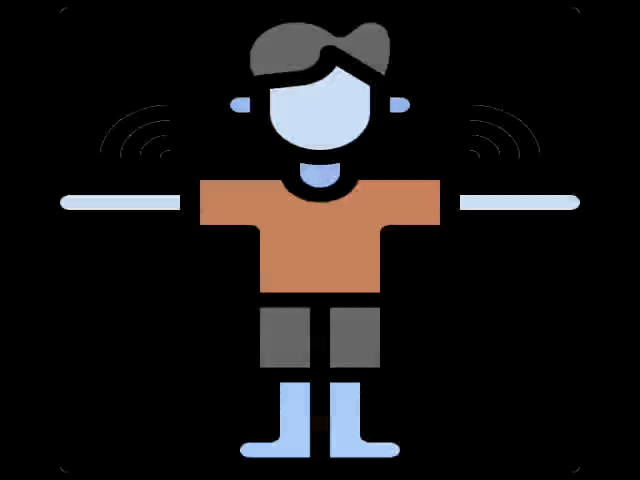

In [11]:
import cv2
import time
from PIL import Image
gst_str = 'udpsrc port=5000 caps = "application/x-rtp, media=(string)video, clock-rate=(int)90000, encoding-name=(string)H264, payload=(int)96" ! rtph264depay ! decodebin ! videoconvert ! appsink'

cap = cv2.VideoCapture(gst_str, cv2.CAP_GSTREAMER)

ret,frame = cap.read()

cap.release()

Image.fromarray(frame)